In [1]:
#numerical and dataframe manipulations
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#stats
from scipy import stats
from scipy.stats import norm, skew

#missing data
from sklearn.impute import SimpleImputer

#classifiers
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#metrics
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

import random

#warnings
import warnings
warnings.filterwarnings('ignore')

import time

In [2]:
SEED = 9 #change to a different value to get a different starter score
np.random.seed(SEED)
random.seed(SEED)

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [5]:
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,...,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,...,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,...,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,...,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,...,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+07,1.318126e+07,...,167.078250,137.207250,0.628573,10.100000,0.756544,0.000000,0.000000,1.195997e+03,1.254155,5.007093e-01
max,3900.000000,22.315050,34.541400,206.452800,297.885600,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,...,401.413500,211.693500,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,24.000000,2.524591e+08


In [6]:
def check_missing(df):
    total = df.isna().sum()
    percentage = (df.isna().sum()/df.shape[0])*100
    missing = pd.concat([total, percentage], axis=1, keys=['Total', 'percent (%)'])
    return np.transpose(missing)

In [7]:
check_missing(train)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Total,0.0,2529.000000,3844.000000,355.000000,355.000000,355.000000,13360.000000,5163.000000,13360.000000,8008.0,...,1323.0000,568.000000,5383.0000,31317.000000,15904.0,0.0,20889.000000,355.000000,11056.000000,0.0
percent (%),0.0,4.516071,6.864286,0.633929,0.633929,0.633929,23.857143,9.219643,23.857143,14.3,...,2.3625,1.014286,9.6125,55.923214,28.4,0.0,37.301786,0.633929,19.742857,0.0


In [8]:
check_missing(test)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
Total,0.0,1110.000,1709.000000,146.000000,146.000000,146.000000,5604.00,2231.000000,5604.00,3400.000000,...,16349.000000,578.000000,250.000000,2362.000000,13538.000000,6885.0000,0.0,8922.000,146.000000,4797.0000
percent (%),0.0,4.625,7.120833,0.608333,0.608333,0.608333,23.35,9.295833,23.35,14.166667,...,68.120833,2.408333,1.041667,9.841667,56.408333,28.6875,0.0,37.175,0.608333,19.9875


In [9]:
train.shape, test.shape

((56000, 52), (24000, 51))

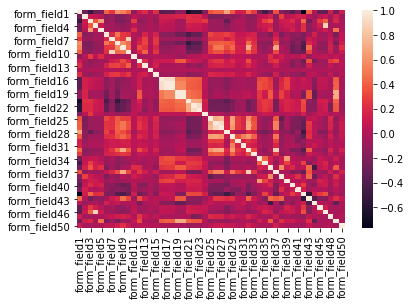

In [10]:
sns.heatmap(train.corr())

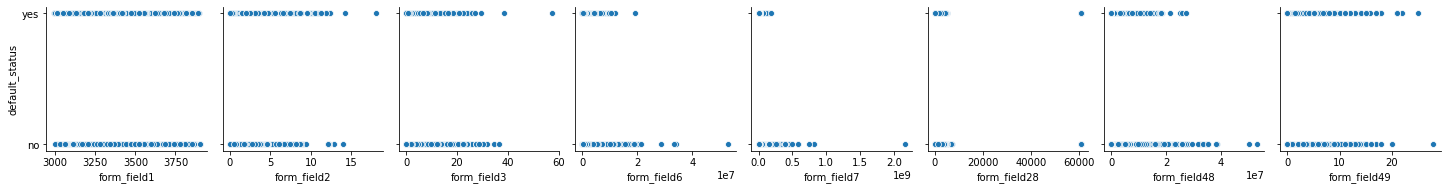

In [11]:
sns.pairplot(data=train, y_vars=['default_status'], x_vars=['form_field1', 'form_field2', 'form_field3', 'form_field6','form_field7','form_field28', 'form_field48', 'form_field49'])

In [12]:
#outlier checks in number
train[train['form_field28'] >= 50000].shape, train[train['form_field6'] >= 4e7].shape, train[train['form_field7'] >= 1.5e9].shape, 

((15407, 52), (1, 52), (1, 52))

In [13]:
#remove some outliers

#train28
train = train[train['form_field28'] <= 50000].reset_index(drop=True)

In [14]:
train.shape

(40238, 52)

In [39]:
def target_flow(train):
    defaulters = train[train['default_status'] == 'yes'].shape[0]
    total = train.shape[0]
    percent = (defaulters/total)*100
    return f'Defaulters in percent is {np.round(percent, decimals=2)}'

In [40]:
target_flow(train)

'Defaulters in percent is 30.22'

In [41]:
train['default_status'].value_counts()

no     28080
yes    12158
Name: default_status, dtype: int64

In [42]:
train['form_field47'].value_counts()

charge     28545
lending    11693
Name: form_field47, dtype: int64

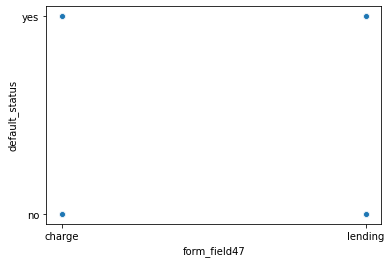

In [43]:
sns.scatterplot(train['form_field47'], train['default_status'])

In [45]:
imp_mean = SimpleImputer(strategy='mean', fill_value=np.nan)

In [48]:
train_mean = imp_mean.fit_transform(train.drop(['Applicant_ID', 'form_field47', 'default_status'], axis=1))
test_mean = imp_mean.transform(test.drop(['Applicant_ID', 'form_field47'], axis=1))

In [49]:
train_ = pd.DataFrame(train_mean, columns=train.drop(['Applicant_ID', 'form_field47', 'default_status'], axis=1).columns)
test_ = pd.DataFrame(test_mean, columns=test.drop(['Applicant_ID', 'form_field47'], axis=1).columns)

In [51]:
train_.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,...,152.003625,109.870944,0.392854,2.02,0.711632,0.000000,0.0,212244.246183,1.129518,0.044335
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,...,152.003625,109.870944,0.314281,8.08,0.183584,0.106891,0.0,349.805730,1.620483,0.322436
2,3276.0,0.53845,3.1510,0.0,6.282,322897.083846,956940.0,1.541810e+06,192944.0,1079864.0,...,149.680500,109.870944,0.162965,18.18,0.791136,0.000000,0.0,212244.246183,1.513370,0.011640
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,...,152.003625,109.870944,0.488884,2.02,0.685168,0.106891,0.0,89.940100,0.664452,0.082729
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,...,150.013500,109.870944,0.275000,12.12,0.438168,0.000000,0.0,97.887502,1.427891,0.045630


In [52]:
train_['source'] = 'train'
test_['source'] = 'test'

In [55]:
target = train['default_status'].copy()

In [56]:
#combine both train and test for feature engineering. Also, being careful to cause data leakage (no transforms)
combo = pd.concat([train_, test_], axis=0)
combo.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,source
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,...,109.870944,0.392854,2.02,0.711632,0.000000,0.0,212244.246183,1.129518,0.044335,train
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,...,109.870944,0.314281,8.08,0.183584,0.106891,0.0,349.805730,1.620483,0.322436,train
2,3276.0,0.53845,3.1510,0.0,6.282,322897.083846,956940.0,1.541810e+06,192944.0,1079864.0,...,109.870944,0.162965,18.18,0.791136,0.000000,0.0,212244.246183,1.513370,0.011640,train
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,...,109.870944,0.488884,2.02,0.685168,0.106891,0.0,89.940100,0.664452,0.082729,train
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,...,109.870944,0.275000,12.12,0.438168,0.000000,0.0,97.887502,1.427891,0.045630,train


In [57]:
combo.reset_index(drop=True, inplace=True)

In [58]:
check_missing(combo)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,source
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Feature Engineering - MINOR

combo['income_collateral'] = combo['form_field14'] - combo['form_field15']
combo['income_loan_repay'] = combo['form_field14'] - combo['form_field13']
combo['income_due'] = (combo.form_field14 - combo.form_field12)/10000

combo['max_min_active'] = combo.form_field8 - combo.form_field6
combo['max_active'] = combo.form_field8 - combo.form_field7


combo['edu_auto'] = combo.form_field5 - combo.form_field4
combo['auto_any'] = combo.form_field4 - combo.form_field3
combo['edu_any'] = combo.form_field5 - combo.form_field3

combo['percentage_edu_auto'] = combo.form_field40 - combo.form_field41

combo['active_lines_now'] = combo.form_field38 - combo.form_field36
combo['deliq'] = combo.form_field38 - combo.form_field39
combo['deliq_ff1'] = (combo.deliq/(combo['form_field1']))

combo['unknowns'] = ((combo.form_field48/(combo.form_field49 + 1))/10000)*combo.form_field50
combo['ps'] = (combo.income_due - combo.income_collateral)/10000

combo['tenure_days'] = combo.form_field27/(combo.form_field25 + 1)

combo['extrasI'] = combo.form_field17/combo.form_field1
combo['extrasII'] = combo.form_field14/combo.form_field1
combo['extrasIII'] = combo.form_field1*combo.form_field49

In [60]:
def check_inf(combo):
    neg_inf = -np.inf in combo
    pos_inf = np.inf in combo
    return neg_inf, pos_inf

In [61]:
check_inf(combo)

(False, False)

In [63]:
train_data = combo[combo['source'] == 'train']
test_data = combo[combo['source'] == 'test']

In [66]:
train_data['default_status'] = target.values

In [70]:
train_data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,active_lines_now,deliq,deliq_ff1,unknowns,ps,tenure_days,extrasI,extrasII,extrasIII,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,...,-8.0,4.0,0.001164,0.441875,1581.603338,2.842934,0.000291,28048.643481,3881.024096,no
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,...,-8.0,8.0,0.002315,0.004304,1703.089085,2.148486,0.000289,8142.774016,5600.388916,no
2,3276.0,0.53845,3.1510,0.0,6.282,322897.083846,956940.0,1.541810e+06,192944.0,1079864.0,...,-6.0,6.0,0.001832,0.098292,587.764976,1.979356,0.000105,5059.968559,4957.801012,yes
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,...,0.0,3.0,0.000890,0.000447,8811.518656,1.572268,0.000000,14290.443357,2240.531561,no
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,...,0.0,24.0,0.007122,0.000184,-1284.593770,1.411082,0.000000,8350.571810,4811.994288,no


In [73]:
train_data['default_status'] = train_data.default_status.map({'yes':1, 'no':0}).astype('int8')

In [74]:
train_data['default_status']

0        0
1        0
2        1
3        0
4        0
        ..
40233    1
40234    1
40235    0
40236    0
40237    0
Name: default_status, Length: 40238, dtype: int8

In [75]:
train_data.corr()['default_status'].sort_values()

form_field1      -0.370446
form_field29     -0.200179
form_field28     -0.200068
form_field37     -0.192506
form_field32     -0.182529
                    ...   
extrasI           0.208950
form_field21      0.217501
form_field22      0.222644
form_field42      0.274859
default_status    1.000000
Name: default_status, Length: 68, dtype: float64

In [78]:
train_data['form_field47'] = train.form_field47.values
test_data['form_field47'] = test.form_field47.values

In [79]:
train_data.shape, test_data.shape

((40238, 70), (24000, 69))

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmeans = KMeans(n_clusters=3, max_iter=400, n_jobs=-1, random_state=3)

In [90]:
train_data['cluster'] = kmeans.fit_predict(train_data[['form_field1','form_field2', 'form_field49']])
test_data['cluster'] = kmeans.predict(test_data[['form_field1','form_field2', 'form_field49']])

In [92]:
train_data.cluster.value_counts()

0    18363
2    11420
1    10455
Name: cluster, dtype: int64

In [93]:
def cluster_map(x):
    if x == 0:
        return 'clu0'
    elif x == 1:
        return 'clu1'
    else:
        return 'clu2'

In [94]:
train_data['cluster'] = train_data.cluster.map(cluster_map)
test_data['cluster'] = test_data.cluster.map(cluster_map)

In [96]:
train_data['cluster'].sample(6)

14836    clu2
13892    clu0
27080    clu0
27622    clu1
18235    clu0
4282     clu0
Name: cluster, dtype: object

In [103]:
train_data.drop(['source'], axis=1, inplace=True)
test_data.drop(['source'], axis=1, inplace=True)

In [104]:
train_data_ = pd.get_dummies(train_data, drop_first=True)
test_data_ = pd.get_dummies(test_data, drop_first=True)

In [105]:
train_data_.corr()['default_status']

form_field1            -0.370446
form_field2             0.183717
form_field3             0.148610
form_field4             0.124824
form_field5             0.071199
                          ...   
extrasIII               0.103117
default_status          1.000000
form_field47_lending   -0.198358
cluster_clu1            0.301621
cluster_clu2           -0.272090
Name: default_status, Length: 71, dtype: float64

In [107]:
#TRAINING
from sklearn.model_selection import train_test_split as tts, StratifiedKFold, cross_val_score

In [108]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [113]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [112]:
#run scoring test
score = cross_val_score(estimator=CatBoostClassifier(learning_rate=0.01, n_estimators=800), cv=skf,\
                       X=train_data_.drop(['default_status'], axis=1), y=train_data_.default_status, n_jobs=1, scoring='roc_auc')

0:	learn: 0.6888807	total: 1.11s	remaining: 14m 47s
1:	learn: 0.6847195	total: 1.27s	remaining: 8m 27s
2:	learn: 0.6808543	total: 1.45s	remaining: 6m 25s
3:	learn: 0.6769206	total: 1.61s	remaining: 5m 21s
4:	learn: 0.6733225	total: 1.78s	remaining: 4m 42s
5:	learn: 0.6694782	total: 1.95s	remaining: 4m 17s
6:	learn: 0.6658002	total: 2.12s	remaining: 4m
7:	learn: 0.6622467	total: 2.28s	remaining: 3m 45s
8:	learn: 0.6588603	total: 2.44s	remaining: 3m 34s
9:	learn: 0.6558699	total: 2.62s	remaining: 3m 26s
10:	learn: 0.6525810	total: 2.8s	remaining: 3m 20s
11:	learn: 0.6493537	total: 2.96s	remaining: 3m 14s
12:	learn: 0.6464414	total: 3.13s	remaining: 3m 9s
13:	learn: 0.6433739	total: 3.29s	remaining: 3m 4s
14:	learn: 0.6407486	total: 3.46s	remaining: 3m
15:	learn: 0.6379551	total: 3.63s	remaining: 2m 57s
16:	learn: 0.6349123	total: 3.8s	remaining: 2m 55s
17:	learn: 0.6320158	total: 3.96s	remaining: 2m 51s
18:	learn: 0.6292001	total: 4.13s	remaining: 2m 49s
19:	learn: 0.6263323	total: 4.3s	

159:	learn: 0.5010092	total: 31.2s	remaining: 2m 4s
160:	learn: 0.5007760	total: 31.4s	remaining: 2m 4s
161:	learn: 0.5005546	total: 31.6s	remaining: 2m 4s
162:	learn: 0.5003179	total: 31.8s	remaining: 2m 4s
163:	learn: 0.5000391	total: 32s	remaining: 2m 4s
164:	learn: 0.4998123	total: 32.3s	remaining: 2m 4s
165:	learn: 0.4996305	total: 32.4s	remaining: 2m 3s
166:	learn: 0.4994179	total: 32.6s	remaining: 2m 3s
167:	learn: 0.4991709	total: 32.8s	remaining: 2m 3s
168:	learn: 0.4989195	total: 33s	remaining: 2m 3s
169:	learn: 0.4987364	total: 33.2s	remaining: 2m 2s
170:	learn: 0.4984959	total: 33.4s	remaining: 2m 3s
171:	learn: 0.4982996	total: 33.7s	remaining: 2m 2s
172:	learn: 0.4980337	total: 34s	remaining: 2m 3s
173:	learn: 0.4978508	total: 34.1s	remaining: 2m 2s
174:	learn: 0.4976229	total: 34.4s	remaining: 2m 2s
175:	learn: 0.4974602	total: 34.6s	remaining: 2m 2s
176:	learn: 0.4972629	total: 34.8s	remaining: 2m 2s
177:	learn: 0.4970816	total: 35s	remaining: 2m 2s
178:	learn: 0.496941

317:	learn: 0.4809888	total: 1m 3s	remaining: 1m 36s
318:	learn: 0.4809194	total: 1m 3s	remaining: 1m 36s
319:	learn: 0.4808469	total: 1m 3s	remaining: 1m 35s
320:	learn: 0.4807719	total: 1m 4s	remaining: 1m 35s
321:	learn: 0.4807084	total: 1m 4s	remaining: 1m 35s
322:	learn: 0.4806670	total: 1m 4s	remaining: 1m 35s
323:	learn: 0.4806062	total: 1m 4s	remaining: 1m 34s
324:	learn: 0.4805187	total: 1m 4s	remaining: 1m 34s
325:	learn: 0.4804513	total: 1m 5s	remaining: 1m 34s
326:	learn: 0.4803990	total: 1m 5s	remaining: 1m 34s
327:	learn: 0.4803550	total: 1m 5s	remaining: 1m 34s
328:	learn: 0.4802977	total: 1m 5s	remaining: 1m 34s
329:	learn: 0.4802234	total: 1m 5s	remaining: 1m 33s
330:	learn: 0.4801384	total: 1m 6s	remaining: 1m 33s
331:	learn: 0.4800714	total: 1m 6s	remaining: 1m 33s
332:	learn: 0.4800223	total: 1m 6s	remaining: 1m 33s
333:	learn: 0.4799708	total: 1m 6s	remaining: 1m 33s
334:	learn: 0.4798769	total: 1m 6s	remaining: 1m 32s
335:	learn: 0.4798080	total: 1m 7s	remaining: 

470:	learn: 0.4737877	total: 1m 33s	remaining: 1m 5s
471:	learn: 0.4737572	total: 1m 34s	remaining: 1m 5s
472:	learn: 0.4737316	total: 1m 34s	remaining: 1m 5s
473:	learn: 0.4737113	total: 1m 34s	remaining: 1m 4s
474:	learn: 0.4736910	total: 1m 34s	remaining: 1m 4s
475:	learn: 0.4736647	total: 1m 34s	remaining: 1m 4s
476:	learn: 0.4736337	total: 1m 34s	remaining: 1m 4s
477:	learn: 0.4736127	total: 1m 35s	remaining: 1m 4s
478:	learn: 0.4735632	total: 1m 35s	remaining: 1m 3s
479:	learn: 0.4735346	total: 1m 35s	remaining: 1m 3s
480:	learn: 0.4734958	total: 1m 35s	remaining: 1m 3s
481:	learn: 0.4734628	total: 1m 35s	remaining: 1m 3s
482:	learn: 0.4734442	total: 1m 36s	remaining: 1m 3s
483:	learn: 0.4734256	total: 1m 36s	remaining: 1m 2s
484:	learn: 0.4733918	total: 1m 36s	remaining: 1m 2s
485:	learn: 0.4733589	total: 1m 36s	remaining: 1m 2s
486:	learn: 0.4733257	total: 1m 36s	remaining: 1m 2s
487:	learn: 0.4733031	total: 1m 37s	remaining: 1m 2s
488:	learn: 0.4732783	total: 1m 37s	remaining:

627:	learn: 0.4695203	total: 2m 4s	remaining: 34.1s
628:	learn: 0.4695093	total: 2m 4s	remaining: 33.9s
629:	learn: 0.4694942	total: 2m 5s	remaining: 33.7s
630:	learn: 0.4694707	total: 2m 5s	remaining: 33.6s
631:	learn: 0.4694509	total: 2m 5s	remaining: 33.4s
632:	learn: 0.4694216	total: 2m 5s	remaining: 33.2s
633:	learn: 0.4693881	total: 2m 5s	remaining: 33s
634:	learn: 0.4693655	total: 2m 6s	remaining: 32.8s
635:	learn: 0.4693535	total: 2m 6s	remaining: 32.6s
636:	learn: 0.4693336	total: 2m 6s	remaining: 32.4s
637:	learn: 0.4693128	total: 2m 6s	remaining: 32.2s
638:	learn: 0.4692681	total: 2m 7s	remaining: 32s
639:	learn: 0.4692565	total: 2m 7s	remaining: 31.8s
640:	learn: 0.4692298	total: 2m 7s	remaining: 31.6s
641:	learn: 0.4692054	total: 2m 7s	remaining: 31.4s
642:	learn: 0.4691824	total: 2m 7s	remaining: 31.2s
643:	learn: 0.4691518	total: 2m 8s	remaining: 31s
644:	learn: 0.4691291	total: 2m 8s	remaining: 30.8s
645:	learn: 0.4690998	total: 2m 8s	remaining: 30.6s
646:	learn: 0.4690

784:	learn: 0.4660727	total: 2m 35s	remaining: 2.98s
785:	learn: 0.4660298	total: 2m 36s	remaining: 2.78s
786:	learn: 0.4660093	total: 2m 36s	remaining: 2.58s
787:	learn: 0.4659919	total: 2m 36s	remaining: 2.38s
788:	learn: 0.4659654	total: 2m 36s	remaining: 2.18s
789:	learn: 0.4659453	total: 2m 36s	remaining: 1.99s
790:	learn: 0.4659234	total: 2m 37s	remaining: 1.79s
791:	learn: 0.4659025	total: 2m 37s	remaining: 1.59s
792:	learn: 0.4658829	total: 2m 37s	remaining: 1.39s
793:	learn: 0.4658578	total: 2m 37s	remaining: 1.19s
794:	learn: 0.4658295	total: 2m 37s	remaining: 992ms
795:	learn: 0.4658084	total: 2m 37s	remaining: 793ms
796:	learn: 0.4657917	total: 2m 38s	remaining: 595ms
797:	learn: 0.4657721	total: 2m 38s	remaining: 396ms
798:	learn: 0.4657423	total: 2m 38s	remaining: 198ms
799:	learn: 0.4657252	total: 2m 38s	remaining: 0us
0:	learn: 0.6890634	total: 216ms	remaining: 2m 52s
1:	learn: 0.6849932	total: 391ms	remaining: 2m 35s
2:	learn: 0.6811733	total: 554ms	remaining: 2m 27s
3

141:	learn: 0.5065012	total: 28.9s	remaining: 2m 14s
142:	learn: 0.5061776	total: 29.1s	remaining: 2m 13s
143:	learn: 0.5058184	total: 29.3s	remaining: 2m 13s
144:	learn: 0.5055473	total: 29.5s	remaining: 2m 13s
145:	learn: 0.5052255	total: 29.8s	remaining: 2m 13s
146:	learn: 0.5049667	total: 30s	remaining: 2m 13s
147:	learn: 0.5047113	total: 30.2s	remaining: 2m 13s
148:	learn: 0.5044318	total: 30.4s	remaining: 2m 12s
149:	learn: 0.5042141	total: 30.6s	remaining: 2m 12s
150:	learn: 0.5039123	total: 30.8s	remaining: 2m 12s
151:	learn: 0.5037092	total: 31s	remaining: 2m 12s
152:	learn: 0.5034121	total: 31.2s	remaining: 2m 12s
153:	learn: 0.5031688	total: 31.5s	remaining: 2m 11s
154:	learn: 0.5028562	total: 31.7s	remaining: 2m 11s
155:	learn: 0.5025497	total: 31.9s	remaining: 2m 11s
156:	learn: 0.5023116	total: 32.1s	remaining: 2m 11s
157:	learn: 0.5020312	total: 32.3s	remaining: 2m 11s
158:	learn: 0.5017419	total: 32.5s	remaining: 2m 10s
159:	learn: 0.5015110	total: 32.7s	remaining: 2m 1

299:	learn: 0.4829300	total: 1m 2s	remaining: 1m 43s
300:	learn: 0.4828591	total: 1m 2s	remaining: 1m 43s
301:	learn: 0.4827870	total: 1m 2s	remaining: 1m 43s
302:	learn: 0.4827048	total: 1m 2s	remaining: 1m 42s
303:	learn: 0.4826414	total: 1m 2s	remaining: 1m 42s
304:	learn: 0.4825703	total: 1m 3s	remaining: 1m 42s
305:	learn: 0.4824944	total: 1m 3s	remaining: 1m 42s
306:	learn: 0.4824066	total: 1m 3s	remaining: 1m 41s
307:	learn: 0.4823344	total: 1m 3s	remaining: 1m 41s
308:	learn: 0.4822595	total: 1m 3s	remaining: 1m 41s
309:	learn: 0.4822004	total: 1m 4s	remaining: 1m 41s
310:	learn: 0.4821339	total: 1m 4s	remaining: 1m 41s
311:	learn: 0.4820721	total: 1m 4s	remaining: 1m 40s
312:	learn: 0.4820042	total: 1m 4s	remaining: 1m 40s
313:	learn: 0.4819357	total: 1m 4s	remaining: 1m 40s
314:	learn: 0.4818669	total: 1m 5s	remaining: 1m 40s
315:	learn: 0.4817867	total: 1m 5s	remaining: 1m 39s
316:	learn: 0.4817194	total: 1m 5s	remaining: 1m 39s
317:	learn: 0.4816387	total: 1m 5s	remaining: 

452:	learn: 0.4753276	total: 1m 34s	remaining: 1m 12s
453:	learn: 0.4753015	total: 1m 34s	remaining: 1m 12s
454:	learn: 0.4752544	total: 1m 35s	remaining: 1m 12s
455:	learn: 0.4752258	total: 1m 35s	remaining: 1m 11s
456:	learn: 0.4751839	total: 1m 35s	remaining: 1m 11s
457:	learn: 0.4751474	total: 1m 35s	remaining: 1m 11s
458:	learn: 0.4751300	total: 1m 35s	remaining: 1m 11s
459:	learn: 0.4750905	total: 1m 36s	remaining: 1m 11s
460:	learn: 0.4750602	total: 1m 36s	remaining: 1m 10s
461:	learn: 0.4750275	total: 1m 36s	remaining: 1m 10s
462:	learn: 0.4749815	total: 1m 36s	remaining: 1m 10s
463:	learn: 0.4749380	total: 1m 36s	remaining: 1m 10s
464:	learn: 0.4749016	total: 1m 37s	remaining: 1m 9s
465:	learn: 0.4748716	total: 1m 37s	remaining: 1m 9s
466:	learn: 0.4748512	total: 1m 37s	remaining: 1m 9s
467:	learn: 0.4748305	total: 1m 37s	remaining: 1m 9s
468:	learn: 0.4748140	total: 1m 38s	remaining: 1m 9s
469:	learn: 0.4747823	total: 1m 38s	remaining: 1m 8s
470:	learn: 0.4747439	total: 1m 38

609:	learn: 0.4708872	total: 2m 8s	remaining: 40s
610:	learn: 0.4708595	total: 2m 8s	remaining: 39.8s
611:	learn: 0.4708174	total: 2m 8s	remaining: 39.5s
612:	learn: 0.4707933	total: 2m 8s	remaining: 39.3s
613:	learn: 0.4707705	total: 2m 9s	remaining: 39.1s
614:	learn: 0.4707400	total: 2m 9s	remaining: 38.9s
615:	learn: 0.4707065	total: 2m 9s	remaining: 38.7s
616:	learn: 0.4706950	total: 2m 9s	remaining: 38.5s
617:	learn: 0.4706531	total: 2m 10s	remaining: 38.3s
618:	learn: 0.4706456	total: 2m 10s	remaining: 38.1s
619:	learn: 0.4706179	total: 2m 10s	remaining: 37.9s
620:	learn: 0.4705939	total: 2m 10s	remaining: 37.7s
621:	learn: 0.4705670	total: 2m 10s	remaining: 37.5s
622:	learn: 0.4705451	total: 2m 11s	remaining: 37.3s
623:	learn: 0.4705095	total: 2m 11s	remaining: 37.1s
624:	learn: 0.4704978	total: 2m 11s	remaining: 36.8s
625:	learn: 0.4704802	total: 2m 11s	remaining: 36.6s
626:	learn: 0.4704558	total: 2m 12s	remaining: 36.4s
627:	learn: 0.4704320	total: 2m 12s	remaining: 36.2s
628

765:	learn: 0.4674367	total: 2m 42s	remaining: 7.22s
766:	learn: 0.4674212	total: 2m 42s	remaining: 7.01s
767:	learn: 0.4673967	total: 2m 43s	remaining: 6.8s
768:	learn: 0.4673834	total: 2m 43s	remaining: 6.58s
769:	learn: 0.4673543	total: 2m 43s	remaining: 6.37s
770:	learn: 0.4673353	total: 2m 43s	remaining: 6.16s
771:	learn: 0.4673083	total: 2m 43s	remaining: 5.95s
772:	learn: 0.4672922	total: 2m 44s	remaining: 5.73s
773:	learn: 0.4672754	total: 2m 44s	remaining: 5.52s
774:	learn: 0.4672535	total: 2m 44s	remaining: 5.31s
775:	learn: 0.4672241	total: 2m 44s	remaining: 5.1s
776:	learn: 0.4672048	total: 2m 45s	remaining: 4.89s
777:	learn: 0.4671923	total: 2m 45s	remaining: 4.68s
778:	learn: 0.4671695	total: 2m 45s	remaining: 4.46s
779:	learn: 0.4671582	total: 2m 45s	remaining: 4.25s
780:	learn: 0.4671467	total: 2m 46s	remaining: 4.04s
781:	learn: 0.4671289	total: 2m 46s	remaining: 3.83s
782:	learn: 0.4671110	total: 2m 46s	remaining: 3.62s
783:	learn: 0.4670978	total: 2m 46s	remaining: 3

123:	learn: 0.5124663	total: 30.4s	remaining: 2m 45s
124:	learn: 0.5120509	total: 30.6s	remaining: 2m 45s
125:	learn: 0.5116588	total: 30.9s	remaining: 2m 45s
126:	learn: 0.5112947	total: 31.1s	remaining: 2m 44s
127:	learn: 0.5109373	total: 31.4s	remaining: 2m 44s
128:	learn: 0.5105492	total: 31.6s	remaining: 2m 44s
129:	learn: 0.5101599	total: 32s	remaining: 2m 44s
130:	learn: 0.5098433	total: 32.4s	remaining: 2m 45s
131:	learn: 0.5094140	total: 32.8s	remaining: 2m 45s
132:	learn: 0.5090487	total: 33.2s	remaining: 2m 46s
133:	learn: 0.5087513	total: 33.6s	remaining: 2m 46s
134:	learn: 0.5084437	total: 33.9s	remaining: 2m 47s
135:	learn: 0.5081089	total: 34.1s	remaining: 2m 46s
136:	learn: 0.5077808	total: 34.3s	remaining: 2m 46s
137:	learn: 0.5074656	total: 34.6s	remaining: 2m 46s
138:	learn: 0.5071859	total: 34.9s	remaining: 2m 45s
139:	learn: 0.5068964	total: 35.1s	remaining: 2m 45s
140:	learn: 0.5066228	total: 35.4s	remaining: 2m 45s
141:	learn: 0.5062899	total: 35.6s	remaining: 2m

279:	learn: 0.4841552	total: 1m 9s	remaining: 2m 8s
280:	learn: 0.4840776	total: 1m 9s	remaining: 2m 8s
281:	learn: 0.4840137	total: 1m 9s	remaining: 2m 7s
282:	learn: 0.4839423	total: 1m 9s	remaining: 2m 7s
283:	learn: 0.4838576	total: 1m 10s	remaining: 2m 7s
284:	learn: 0.4837601	total: 1m 10s	remaining: 2m 6s
285:	learn: 0.4836521	total: 1m 10s	remaining: 2m 6s
286:	learn: 0.4835867	total: 1m 10s	remaining: 2m 6s
287:	learn: 0.4835029	total: 1m 10s	remaining: 2m 6s
288:	learn: 0.4834024	total: 1m 11s	remaining: 2m 5s
289:	learn: 0.4833064	total: 1m 11s	remaining: 2m 5s
290:	learn: 0.4832152	total: 1m 11s	remaining: 2m 5s
291:	learn: 0.4831437	total: 1m 11s	remaining: 2m 5s
292:	learn: 0.4830588	total: 1m 12s	remaining: 2m 4s
293:	learn: 0.4829840	total: 1m 12s	remaining: 2m 4s
294:	learn: 0.4829374	total: 1m 12s	remaining: 2m 4s
295:	learn: 0.4828851	total: 1m 12s	remaining: 2m 4s
296:	learn: 0.4828236	total: 1m 13s	remaining: 2m 4s
297:	learn: 0.4827470	total: 1m 13s	remaining: 2m 

432:	learn: 0.4756251	total: 1m 45s	remaining: 1m 29s
433:	learn: 0.4755957	total: 1m 46s	remaining: 1m 29s
434:	learn: 0.4755548	total: 1m 46s	remaining: 1m 29s
435:	learn: 0.4755204	total: 1m 46s	remaining: 1m 29s
436:	learn: 0.4754652	total: 1m 46s	remaining: 1m 28s
437:	learn: 0.4754084	total: 1m 47s	remaining: 1m 28s
438:	learn: 0.4753613	total: 1m 47s	remaining: 1m 28s
439:	learn: 0.4753080	total: 1m 47s	remaining: 1m 28s
440:	learn: 0.4752771	total: 1m 47s	remaining: 1m 27s
441:	learn: 0.4752547	total: 1m 48s	remaining: 1m 27s
442:	learn: 0.4752216	total: 1m 48s	remaining: 1m 27s
443:	learn: 0.4751750	total: 1m 48s	remaining: 1m 27s
444:	learn: 0.4751278	total: 1m 48s	remaining: 1m 26s
445:	learn: 0.4750902	total: 1m 49s	remaining: 1m 26s
446:	learn: 0.4750483	total: 1m 49s	remaining: 1m 26s
447:	learn: 0.4749962	total: 1m 49s	remaining: 1m 26s
448:	learn: 0.4749632	total: 1m 49s	remaining: 1m 25s
449:	learn: 0.4749194	total: 1m 49s	remaining: 1m 25s
450:	learn: 0.4748783	total:

587:	learn: 0.4708892	total: 2m 23s	remaining: 51.6s
588:	learn: 0.4708594	total: 2m 23s	remaining: 51.3s
589:	learn: 0.4708281	total: 2m 23s	remaining: 51.1s
590:	learn: 0.4708127	total: 2m 23s	remaining: 50.9s
591:	learn: 0.4707863	total: 2m 24s	remaining: 50.6s
592:	learn: 0.4707650	total: 2m 24s	remaining: 50.4s
593:	learn: 0.4707361	total: 2m 24s	remaining: 50.2s
594:	learn: 0.4707068	total: 2m 24s	remaining: 49.9s
595:	learn: 0.4706631	total: 2m 25s	remaining: 49.7s
596:	learn: 0.4706439	total: 2m 25s	remaining: 49.4s
597:	learn: 0.4706256	total: 2m 25s	remaining: 49.2s
598:	learn: 0.4706110	total: 2m 25s	remaining: 48.9s
599:	learn: 0.4705933	total: 2m 26s	remaining: 48.7s
600:	learn: 0.4705640	total: 2m 26s	remaining: 48.4s
601:	learn: 0.4705446	total: 2m 26s	remaining: 48.2s
602:	learn: 0.4705218	total: 2m 26s	remaining: 47.9s
603:	learn: 0.4704970	total: 2m 26s	remaining: 47.7s
604:	learn: 0.4704696	total: 2m 27s	remaining: 47.5s
605:	learn: 0.4704441	total: 2m 27s	remaining:

743:	learn: 0.4674352	total: 3m 1s	remaining: 13.7s
744:	learn: 0.4674019	total: 3m 1s	remaining: 13.4s
745:	learn: 0.4673852	total: 3m 2s	remaining: 13.2s
746:	learn: 0.4673664	total: 3m 2s	remaining: 12.9s
747:	learn: 0.4673425	total: 3m 2s	remaining: 12.7s
748:	learn: 0.4673296	total: 3m 2s	remaining: 12.4s
749:	learn: 0.4672945	total: 3m 2s	remaining: 12.2s
750:	learn: 0.4672808	total: 3m 3s	remaining: 12s
751:	learn: 0.4672646	total: 3m 3s	remaining: 11.7s
752:	learn: 0.4672499	total: 3m 3s	remaining: 11.5s
753:	learn: 0.4672279	total: 3m 3s	remaining: 11.2s
754:	learn: 0.4672070	total: 3m 4s	remaining: 11s
755:	learn: 0.4671909	total: 3m 4s	remaining: 10.7s
756:	learn: 0.4671749	total: 3m 4s	remaining: 10.5s
757:	learn: 0.4671407	total: 3m 4s	remaining: 10.2s
758:	learn: 0.4671165	total: 3m 5s	remaining: 10s
759:	learn: 0.4671000	total: 3m 5s	remaining: 9.76s
760:	learn: 0.4670821	total: 3m 5s	remaining: 9.51s
761:	learn: 0.4670578	total: 3m 5s	remaining: 9.27s
762:	learn: 0.4670

102:	learn: 0.5228392	total: 26.4s	remaining: 2m 58s
103:	learn: 0.5222595	total: 26.7s	remaining: 2m 58s
104:	learn: 0.5217074	total: 27s	remaining: 2m 58s
105:	learn: 0.5211430	total: 27.3s	remaining: 2m 58s
106:	learn: 0.5206596	total: 27.5s	remaining: 2m 58s
107:	learn: 0.5201276	total: 27.8s	remaining: 2m 57s
108:	learn: 0.5195778	total: 28s	remaining: 2m 57s
109:	learn: 0.5190315	total: 28.3s	remaining: 2m 57s
110:	learn: 0.5186191	total: 28.6s	remaining: 2m 57s
111:	learn: 0.5181403	total: 28.8s	remaining: 2m 57s
112:	learn: 0.5176727	total: 29.1s	remaining: 2m 56s
113:	learn: 0.5172434	total: 29.3s	remaining: 2m 56s
114:	learn: 0.5168049	total: 29.6s	remaining: 2m 56s
115:	learn: 0.5163855	total: 29.9s	remaining: 2m 56s
116:	learn: 0.5159964	total: 30.2s	remaining: 2m 56s
117:	learn: 0.5156224	total: 30.4s	remaining: 2m 55s
118:	learn: 0.5152382	total: 30.6s	remaining: 2m 54s
119:	learn: 0.5148226	total: 30.8s	remaining: 2m 54s
120:	learn: 0.5144371	total: 31s	remaining: 2m 54s

258:	learn: 0.4867159	total: 1m 7s	remaining: 2m 20s
259:	learn: 0.4866230	total: 1m 7s	remaining: 2m 20s
260:	learn: 0.4865235	total: 1m 7s	remaining: 2m 20s
261:	learn: 0.4864116	total: 1m 8s	remaining: 2m 19s
262:	learn: 0.4863034	total: 1m 8s	remaining: 2m 19s
263:	learn: 0.4862151	total: 1m 8s	remaining: 2m 19s
264:	learn: 0.4861141	total: 1m 8s	remaining: 2m 19s
265:	learn: 0.4860126	total: 1m 9s	remaining: 2m 18s
266:	learn: 0.4859346	total: 1m 9s	remaining: 2m 18s
267:	learn: 0.4858181	total: 1m 9s	remaining: 2m 18s
268:	learn: 0.4857199	total: 1m 9s	remaining: 2m 18s
269:	learn: 0.4856039	total: 1m 10s	remaining: 2m 18s
270:	learn: 0.4855237	total: 1m 10s	remaining: 2m 18s
271:	learn: 0.4854232	total: 1m 10s	remaining: 2m 17s
272:	learn: 0.4853435	total: 1m 11s	remaining: 2m 17s
273:	learn: 0.4852657	total: 1m 11s	remaining: 2m 17s
274:	learn: 0.4851616	total: 1m 11s	remaining: 2m 17s
275:	learn: 0.4850929	total: 1m 12s	remaining: 2m 17s
276:	learn: 0.4849994	total: 1m 12s	rem

411:	learn: 0.4771586	total: 1m 50s	remaining: 1m 44s
412:	learn: 0.4771047	total: 1m 51s	remaining: 1m 44s
413:	learn: 0.4770789	total: 1m 51s	remaining: 1m 43s
414:	learn: 0.4770487	total: 1m 51s	remaining: 1m 43s
415:	learn: 0.4770148	total: 1m 51s	remaining: 1m 43s
416:	learn: 0.4769709	total: 1m 52s	remaining: 1m 42s
417:	learn: 0.4769384	total: 1m 52s	remaining: 1m 42s
418:	learn: 0.4769030	total: 1m 52s	remaining: 1m 42s
419:	learn: 0.4768687	total: 1m 52s	remaining: 1m 42s
420:	learn: 0.4768305	total: 1m 53s	remaining: 1m 41s
421:	learn: 0.4767861	total: 1m 53s	remaining: 1m 41s
422:	learn: 0.4767478	total: 1m 53s	remaining: 1m 41s
423:	learn: 0.4767109	total: 1m 53s	remaining: 1m 41s
424:	learn: 0.4766852	total: 1m 54s	remaining: 1m 40s
425:	learn: 0.4766326	total: 1m 54s	remaining: 1m 40s
426:	learn: 0.4765918	total: 1m 54s	remaining: 1m 40s
427:	learn: 0.4765566	total: 1m 54s	remaining: 1m 39s
428:	learn: 0.4765248	total: 1m 55s	remaining: 1m 39s
429:	learn: 0.4764686	total:

565:	learn: 0.4724842	total: 2m 31s	remaining: 1m 2s
566:	learn: 0.4724538	total: 2m 31s	remaining: 1m 2s
567:	learn: 0.4724306	total: 2m 32s	remaining: 1m 2s
568:	learn: 0.4724082	total: 2m 32s	remaining: 1m 1s
569:	learn: 0.4723856	total: 2m 32s	remaining: 1m 1s
570:	learn: 0.4723638	total: 2m 32s	remaining: 1m 1s
571:	learn: 0.4723420	total: 2m 33s	remaining: 1m 1s
572:	learn: 0.4723048	total: 2m 33s	remaining: 1m
573:	learn: 0.4722771	total: 2m 33s	remaining: 1m
574:	learn: 0.4722562	total: 2m 33s	remaining: 1m
575:	learn: 0.4722289	total: 2m 34s	remaining: 60s
576:	learn: 0.4722014	total: 2m 34s	remaining: 59.7s
577:	learn: 0.4721697	total: 2m 34s	remaining: 59.5s
578:	learn: 0.4721427	total: 2m 35s	remaining: 59.2s
579:	learn: 0.4721151	total: 2m 35s	remaining: 59s
580:	learn: 0.4720930	total: 2m 35s	remaining: 58.7s
581:	learn: 0.4720704	total: 2m 36s	remaining: 58.5s
582:	learn: 0.4720386	total: 2m 36s	remaining: 58.2s
583:	learn: 0.4720187	total: 2m 36s	remaining: 57.9s
584:	l

723:	learn: 0.4688732	total: 3m 15s	remaining: 20.5s
724:	learn: 0.4688656	total: 3m 15s	remaining: 20.2s
725:	learn: 0.4688444	total: 3m 15s	remaining: 20s
726:	learn: 0.4688186	total: 3m 16s	remaining: 19.7s
727:	learn: 0.4688098	total: 3m 16s	remaining: 19.4s
728:	learn: 0.4687972	total: 3m 16s	remaining: 19.2s
729:	learn: 0.4687635	total: 3m 17s	remaining: 18.9s
730:	learn: 0.4687318	total: 3m 17s	remaining: 18.6s
731:	learn: 0.4686968	total: 3m 17s	remaining: 18.4s
732:	learn: 0.4686596	total: 3m 17s	remaining: 18.1s
733:	learn: 0.4686363	total: 3m 18s	remaining: 17.8s
734:	learn: 0.4686236	total: 3m 18s	remaining: 17.6s
735:	learn: 0.4686043	total: 3m 18s	remaining: 17.3s
736:	learn: 0.4685953	total: 3m 19s	remaining: 17s
737:	learn: 0.4685704	total: 3m 19s	remaining: 16.7s
738:	learn: 0.4685512	total: 3m 19s	remaining: 16.5s
739:	learn: 0.4685313	total: 3m 19s	remaining: 16.2s
740:	learn: 0.4685012	total: 3m 20s	remaining: 15.9s
741:	learn: 0.4684787	total: 3m 20s	remaining: 15.

80:	learn: 0.5366778	total: 22.4s	remaining: 3m 19s
81:	learn: 0.5358863	total: 22.8s	remaining: 3m 19s
82:	learn: 0.5351261	total: 23.1s	remaining: 3m 19s
83:	learn: 0.5343150	total: 23.4s	remaining: 3m 19s
84:	learn: 0.5335214	total: 23.6s	remaining: 3m 18s
85:	learn: 0.5327706	total: 23.8s	remaining: 3m 17s
86:	learn: 0.5321264	total: 24s	remaining: 3m 16s
87:	learn: 0.5314565	total: 24.2s	remaining: 3m 16s
88:	learn: 0.5307733	total: 24.5s	remaining: 3m 15s
89:	learn: 0.5301742	total: 24.8s	remaining: 3m 15s
90:	learn: 0.5295154	total: 25.1s	remaining: 3m 15s
91:	learn: 0.5288789	total: 25.3s	remaining: 3m 14s
92:	learn: 0.5281635	total: 25.6s	remaining: 3m 14s
93:	learn: 0.5275108	total: 25.9s	remaining: 3m 14s
94:	learn: 0.5269309	total: 26.2s	remaining: 3m 14s
95:	learn: 0.5264016	total: 26.4s	remaining: 3m 13s
96:	learn: 0.5258550	total: 26.7s	remaining: 3m 13s
97:	learn: 0.5252831	total: 27s	remaining: 3m 13s
98:	learn: 0.5246854	total: 27.2s	remaining: 3m 12s
99:	learn: 0.524

237:	learn: 0.4883732	total: 1m 8s	remaining: 2m 40s
238:	learn: 0.4882654	total: 1m 8s	remaining: 2m 40s
239:	learn: 0.4881605	total: 1m 8s	remaining: 2m 40s
240:	learn: 0.4880602	total: 1m 8s	remaining: 2m 39s
241:	learn: 0.4879216	total: 1m 9s	remaining: 2m 39s
242:	learn: 0.4878143	total: 1m 9s	remaining: 2m 39s
243:	learn: 0.4877134	total: 1m 9s	remaining: 2m 38s
244:	learn: 0.4876280	total: 1m 9s	remaining: 2m 38s
245:	learn: 0.4875138	total: 1m 10s	remaining: 2m 38s
246:	learn: 0.4874143	total: 1m 10s	remaining: 2m 37s
247:	learn: 0.4873080	total: 1m 10s	remaining: 2m 37s
248:	learn: 0.4872174	total: 1m 10s	remaining: 2m 37s
249:	learn: 0.4870965	total: 1m 11s	remaining: 2m 36s
250:	learn: 0.4869738	total: 1m 11s	remaining: 2m 36s
251:	learn: 0.4868938	total: 1m 11s	remaining: 2m 35s
252:	learn: 0.4867665	total: 1m 11s	remaining: 2m 35s
253:	learn: 0.4866621	total: 1m 12s	remaining: 2m 35s
254:	learn: 0.4865871	total: 1m 12s	remaining: 2m 34s
255:	learn: 0.4865032	total: 1m 12s	

390:	learn: 0.4774371	total: 1m 50s	remaining: 1m 55s
391:	learn: 0.4773891	total: 1m 50s	remaining: 1m 55s
392:	learn: 0.4773511	total: 1m 50s	remaining: 1m 54s
393:	learn: 0.4772972	total: 1m 51s	remaining: 1m 54s
394:	learn: 0.4772568	total: 1m 51s	remaining: 1m 54s
395:	learn: 0.4772136	total: 1m 51s	remaining: 1m 54s
396:	learn: 0.4771768	total: 1m 52s	remaining: 1m 53s
397:	learn: 0.4771317	total: 1m 52s	remaining: 1m 53s
398:	learn: 0.4770887	total: 1m 52s	remaining: 1m 53s
399:	learn: 0.4770484	total: 1m 53s	remaining: 1m 53s
400:	learn: 0.4770072	total: 1m 53s	remaining: 1m 52s
401:	learn: 0.4769494	total: 1m 53s	remaining: 1m 52s
402:	learn: 0.4769062	total: 1m 53s	remaining: 1m 52s
403:	learn: 0.4768685	total: 1m 54s	remaining: 1m 51s
404:	learn: 0.4768185	total: 1m 54s	remaining: 1m 51s
405:	learn: 0.4767653	total: 1m 54s	remaining: 1m 51s
406:	learn: 0.4767299	total: 1m 54s	remaining: 1m 50s
407:	learn: 0.4766911	total: 1m 54s	remaining: 1m 50s
408:	learn: 0.4766409	total:

544:	learn: 0.4720301	total: 2m 26s	remaining: 1m 8s
545:	learn: 0.4720149	total: 2m 26s	remaining: 1m 8s
546:	learn: 0.4719904	total: 2m 26s	remaining: 1m 7s
547:	learn: 0.4719645	total: 2m 26s	remaining: 1m 7s
548:	learn: 0.4719480	total: 2m 26s	remaining: 1m 7s
549:	learn: 0.4719049	total: 2m 27s	remaining: 1m 6s
550:	learn: 0.4718532	total: 2m 27s	remaining: 1m 6s
551:	learn: 0.4718358	total: 2m 27s	remaining: 1m 6s
552:	learn: 0.4717983	total: 2m 27s	remaining: 1m 5s
553:	learn: 0.4717644	total: 2m 27s	remaining: 1m 5s
554:	learn: 0.4717133	total: 2m 28s	remaining: 1m 5s
555:	learn: 0.4716802	total: 2m 28s	remaining: 1m 5s
556:	learn: 0.4716563	total: 2m 28s	remaining: 1m 4s
557:	learn: 0.4716331	total: 2m 28s	remaining: 1m 4s
558:	learn: 0.4716123	total: 2m 28s	remaining: 1m 4s
559:	learn: 0.4715941	total: 2m 28s	remaining: 1m 3s
560:	learn: 0.4715627	total: 2m 29s	remaining: 1m 3s
561:	learn: 0.4715418	total: 2m 29s	remaining: 1m 3s
562:	learn: 0.4715055	total: 2m 29s	remaining:

700:	learn: 0.4682033	total: 2m 57s	remaining: 25s
701:	learn: 0.4681798	total: 2m 57s	remaining: 24.8s
702:	learn: 0.4681695	total: 2m 57s	remaining: 24.5s
703:	learn: 0.4681486	total: 2m 57s	remaining: 24.3s
704:	learn: 0.4681390	total: 2m 58s	remaining: 24s
705:	learn: 0.4681252	total: 2m 58s	remaining: 23.7s
706:	learn: 0.4681022	total: 2m 58s	remaining: 23.5s
707:	learn: 0.4680907	total: 2m 58s	remaining: 23.2s
708:	learn: 0.4680608	total: 2m 59s	remaining: 23s
709:	learn: 0.4680351	total: 2m 59s	remaining: 22.7s
710:	learn: 0.4680186	total: 2m 59s	remaining: 22.5s
711:	learn: 0.4680031	total: 2m 59s	remaining: 22.2s
712:	learn: 0.4679800	total: 2m 59s	remaining: 21.9s
713:	learn: 0.4679661	total: 3m	remaining: 21.7s
714:	learn: 0.4679629	total: 3m	remaining: 21.4s
715:	learn: 0.4679496	total: 3m	remaining: 21.2s
716:	learn: 0.4679322	total: 3m	remaining: 20.9s
717:	learn: 0.4678951	total: 3m 1s	remaining: 20.7s
718:	learn: 0.4678628	total: 3m 1s	remaining: 20.4s
719:	learn: 0.467

In [116]:
score, score.mean(), score.std()

(array([0.80394867, 0.8093246 , 0.80371328, 0.81009121, 0.80420159]),
 0.8062558700407045,
 0.002833192888946671)

In [118]:
num_features = train_data.dtypes[train_data.dtypes != 'object'].index
skewed_features = train_data[num_features].apply(lambda x: skew(x.dropna())).sort_values()
skewness_df = pd.DataFrame({'skew':skewed_features})
skewness_df.head(15)

,skew
ps,-114.042618
max_active,-13.212191
form_field41,-1.816596
active_lines_now,-1.327423
form_field44,-0.436799
form_field1,-0.078636
form_field30,0.021815
form_field40,0.588963
percentage_edu_auto,0.776546
default_status,0.861724


In [123]:
Xtrain, Xval, ytrain, yval = tts(train_data_.drop(['default_status'], axis=1), train_data_.default_status.values.ravel(), test_size=.2,  random_state=SEED)

In [133]:
from sklearn import metrics
from datetime import datetime

def score_plot(true, pred):
    print('ROC: ', roc_auc_score(true, pred))
    print('F1: ', f1_score(true, pred))
    print('Accuracy: ', accuracy_score(true, pred))
    print("=======")
    fpr, tpr, threshold = metrics.roc_curve(true, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC: %.2f'%roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROU-AUC')
    plt.show()
    return 


def make_submit(pred, model, val_score='blend-score'):
    now = datetime.strftime(datetime.now(), '%d%a-%H:%M')
    submit_df = pd.DataFrame({'Applicant_ID':test.Applicant_ID, 'default_status':pred})
    filename = f'{model}-{val_score}-{now}.csv'
    submit_df.to_csv(filename, index=False)
    return submit_df.head(10)

In [126]:
#data not standardized or normalized

In [128]:
cat_model = CatBoostClassifier(learning_rate=0.01, n_estimators=2000, early_stopping_rounds=500, eval_metric='AUC', random_state=SEED, verbose=100)

In [129]:
cat_model.fit(Xtrain, ytrain, eval_set=((Xval, yval)))

0:	test: 0.7525649	best: 0.7525649 (0)	total: 207ms	remaining: 6m 53s
100:	test: 0.7853664	best: 0.7853664 (100)	total: 23.8s	remaining: 7m 27s
200:	test: 0.7924237	best: 0.7924237 (200)	total: 47s	remaining: 7m
300:	test: 0.7955705	best: 0.7955705 (300)	total: 1m 7s	remaining: 6m 23s
400:	test: 0.7975679	best: 0.7975679 (400)	total: 1m 27s	remaining: 5m 48s
500:	test: 0.7987946	best: 0.7987946 (500)	total: 1m 47s	remaining: 5m 22s
600:	test: 0.7997131	best: 0.7997131 (600)	total: 2m 7s	remaining: 4m 57s
700:	test: 0.8004271	best: 0.8004271 (700)	total: 2m 28s	remaining: 4m 34s
800:	test: 0.8011807	best: 0.8011807 (800)	total: 2m 49s	remaining: 4m 13s
900:	test: 0.8018363	best: 0.8018363 (900)	total: 3m 10s	remaining: 3m 52s
1000:	test: 0.8023371	best: 0.8023371 (1000)	total: 3m 31s	remaining: 3m 31s
1100:	test: 0.8029347	best: 0.8029347 (1100)	total: 3m 53s	remaining: 3m 10s
1200:	test: 0.8033985	best: 0.8034148 (1198)	total: 4m 13s	remaining: 2m 48s
1300:	test: 0.8038495	best: 0.8038

In [130]:
%%time
train_pred = cat_model.predict(Xtrain)


CPU times: user 505 ms, sys: 7.82 ms, total: 513 ms
Wall time: 393 ms


In [131]:
%%time
val_pred = cat_model.predict(Xval)

CPU times: user 138 ms, sys: 1.79 ms, total: 140 ms
Wall time: 113 ms


ROC:  0.7131730439776296
F1:  0.5986838133188431
Accuracy:  0.7935073004038521


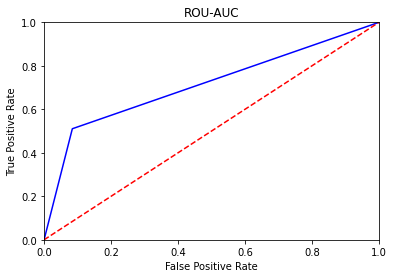

In [134]:
score_plot(ytrain, train_pred)

ROC:  0.6839100141585145
F1:  0.5512230564301284
Accuracy:  0.7697564612326043


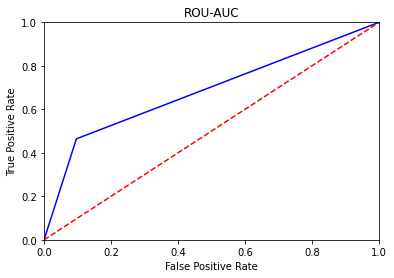

In [135]:
score_plot(yval, val_pred)

In [137]:
cat_pred = cat_model.predict_proba(test_data_)[:,1]
cat_pred

array([0.3050704 , 0.40378588, 0.34555547, ..., 0.29547046, 0.51350005,
       0.14501448])

In [138]:
make_submit(pred=cat_pred, model='CAT-base', val_score=684) #val_score here is 3dp score of my validation(y_val, val_pred)

,Applicant_ID,default_status
0,Apcnt_1000032,0.305070
1,Apcnt_1000048,0.403786
2,Apcnt_1000052,0.345555
3,Apcnt_1000076,0.721271
4,Apcnt_1000080,0.160876
5,Apcnt_1000084,0.355374
6,Apcnt_1000104,0.358605
7,Apcnt_1000116,0.586195
8,Apcnt_1000128,0.399694
9,Apcnt_1000156,0.377140


In [139]:
lgbm_model = LGBMClassifier(learning_rate=.1, n_estimators=2000, n_jobs=-1, random_state=SEED, early_stopping_rounds=70)

In [140]:
lgbm_model.fit(Xtrain, ytrain, eval_set=((Xval, yval)))
lgbm_train = lgbm_model.predict(Xtrain)

[1]	valid_0's binary_logloss: 0.596071
Training until validation scores don't improve for 70 rounds.
[2]	valid_0's binary_logloss: 0.580657
[3]	valid_0's binary_logloss: 0.568039
[4]	valid_0's binary_logloss: 0.557316
[5]	valid_0's binary_logloss: 0.548351
[6]	valid_0's binary_logloss: 0.540899
[7]	valid_0's binary_logloss: 0.534755
[8]	valid_0's binary_logloss: 0.528781
[9]	valid_0's binary_logloss: 0.524211
[10]	valid_0's binary_logloss: 0.520273
[11]	valid_0's binary_logloss: 0.516703
[12]	valid_0's binary_logloss: 0.513063
[13]	valid_0's binary_logloss: 0.510204
[14]	valid_0's binary_logloss: 0.5077
[15]	valid_0's binary_logloss: 0.50533
[16]	valid_0's binary_logloss: 0.503247
[17]	valid_0's binary_logloss: 0.501505
[18]	valid_0's binary_logloss: 0.499974
[19]	valid_0's binary_logloss: 0.498642
[20]	valid_0's binary_logloss: 0.497222
[21]	valid_0's binary_logloss: 0.496159
[22]	valid_0's binary_logloss: 0.495099
[23]	valid_0's binary_logloss: 0.494224
[24]	valid_0's binary_logloss:

ROC:  0.7252965131935061
F1:  0.6182920306650027
Accuracy:  0.8004659832246039


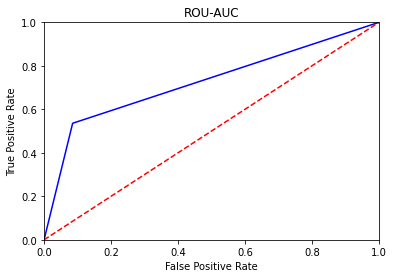

In [141]:
score_plot(ytrain, lgbm_train)

ROC:  0.6807713478260015
F1:  0.5463743676222598
Accuracy:  0.7660288270377733


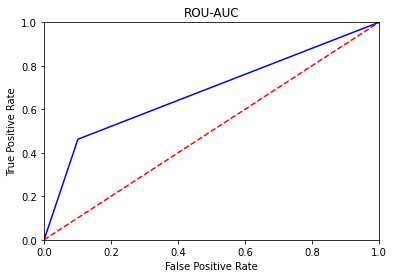

In [142]:
val_pred = lgbm_model.predict(Xval)
score_plot(yval, val_pred)

In [145]:
lgbm_pred = lgbm_model.predict_proba(test_data_)[:,1]
lgbm_pred

array([0.3095807 , 0.3784464 , 0.33258997, ..., 0.17941094, 0.55287677,
       0.12328516])

In [146]:
make_submit(lgbm_pred, 'LGBM-base', 681)

,Applicant_ID,default_status
0,Apcnt_1000032,0.309581
1,Apcnt_1000048,0.378446
2,Apcnt_1000052,0.332590
3,Apcnt_1000076,0.719702
4,Apcnt_1000080,0.132008
5,Apcnt_1000084,0.405926
6,Apcnt_1000104,0.406955
7,Apcnt_1000116,0.525131
8,Apcnt_1000128,0.389880
9,Apcnt_1000156,0.302176


In [147]:
avr_weight = cat_pred*0.7 + lgbm_pred*0.3
avr_weight

array([0.30642349, 0.39618404, 0.34166582, ..., 0.2606526 , 0.52531307,
       0.13849568])

In [148]:
make_submit(avr_weight, model='CAT-LGBM-weighted') #val score falls to default 'blend score'

,Applicant_ID,default_status
0,Apcnt_1000032,0.306423
1,Apcnt_1000048,0.396184
2,Apcnt_1000052,0.341666
3,Apcnt_1000076,0.720800
4,Apcnt_1000080,0.152216
5,Apcnt_1000084,0.370540
6,Apcnt_1000104,0.373110
7,Apcnt_1000116,0.567876
8,Apcnt_1000128,0.396750
9,Apcnt_1000156,0.354651


In [149]:
# LB SCORING(CAT, LGBM, weighted-CAT-LGBM): 0.840, 0.8357, 0.8398, respectively